# Wave Properties

In physics, any type of wave can be described by an amplitude, a wavelength, directions, and a phase.
A monochromatic wave (one carrier wave only) have the following mathematical expression:

$$
a(x, t) = Acos(\vec{k}\vec{x}-\omega t + \varphi)
$$

with A the wave amplitude, $\vec{k}$ the wavenumber vector (inversely proportional to the wave wavelength), $\vec{x}$ the position vector, $\omega$ the *pulsation* or angular velocity (proportional to the wave frequency), and t the time. $\varphi$ is a random phase of the wave

Below an illustration of a monochromatic wave with Python

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.81 # acceleration of gravity

#### Wave initial properties

In [3]:
A = 1 # wave amplitude
period = 10 # wave period in sec
f = 1/period # wave frequency

#### Plot settings

In [4]:
N = 1000 # number of points to plot in time

number_of_period = 10
distance = 100 # in meter
x0 = 20 # location of the measurement (by changing x, you change the phase of the wave); see 1D plot hereinafter


#### Computed wave variables

In [5]:
k = (2*np.pi*f)**2/g # generate a wind wave in deep water (we will come back to this later)
omega = 2*np.pi*f

duration = period * number_of_period
axis_duration = np.linspace(0, number_of_period, N)
t = np.linspace(0, duration, N) # time axis in sec
x = np.linspace(0, distance, N) 

monochromatic_wave = A * np.cos(k*x0-omega*t) # the 1-D array with wave information


In [6]:
# 2D wave (space and time) AND NOT X, Y (or longitude/latitude)
X, T = np.meshgrid(x, t)
monochromatic_wave_2D = A * np.cos(k * X - omega * T)


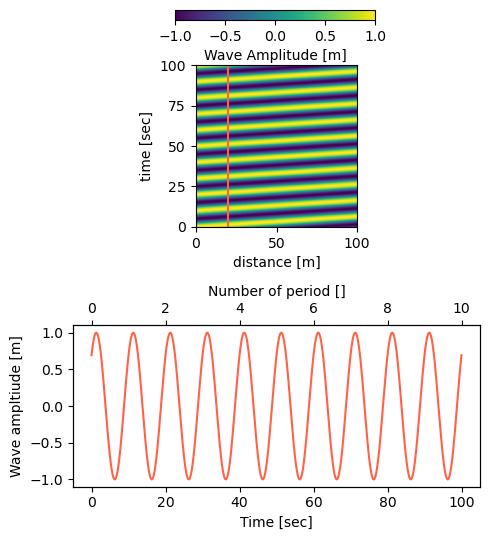

In [7]:
fig, axes = plt.subplots(nrows = 2, figsize = (5, 5))
ax = axes[0]
p1 = ax.pcolormesh(X, T, monochromatic_wave_2D)
cax = fig.add_axes([.36, 1.05, 0.4, .02])
plt.colorbar(p1, cax = cax, label = 'Wave Amplitude [m]', orientation = 'horizontal')
ax.plot([x0, x0], [np.amin(T), np.amax(T)], color = 'tomato')
ax.set_aspect('equal', 'box')
ax.set_xlabel('distance [m]')
ax.set_ylabel('time [sec]')

# a one-dimensional slice of the 2D field
ax = axes[1]
ax2 = ax.twiny()
ax.plot(t, monochromatic_wave, color = 'tomato')
ax2.plot(axis_duration, monochromatic_wave, alpha = 0, color = 'tomato')
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Wave ampltiude [m]')
ax2.set_xlabel('Number of period []')
plt.tight_layout()

Here the **spatial** and the **temporal** dimension are related by a dispersion relationship. In other words, the two dimensions are related by a function that have the form of $\omega$ = f($k$).
In geoscience (and for other mecanical waves) all waves have their dispersion relationship, for instance for wave on a strong: 
$\omega = k\sqrt{\frac{T}{\mu}}$, with k the wavenumber, T the tension force, and $\mu$ the mass of the string per unit of length.